## Problem Statement
- Make a machine learning model that will detect the color from the place clicked in the image/video frame and then display the color

## Imports

In [1]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Utilities
import os

# Notebook Utilities
%matplotlib inline

## Dataset Source Information
These files are generated using a script which parses the list of colors on Wikipedia, here: http://en.wikipedia.org/wiki/List_of_colors   
The script used is (poorly) written in Python and depends heavily on the input format as was copied and pasted from Wikipedia using Firefox into a plain text file. The script is named format-colors and can be found in the same directory as the data files. Run it at your own discretion.   
Source: https://github.com/codebrainz/color-names

## Reading Data

In [2]:
data = pd.read_csv(f'../data/raw/train.csv', names=['Color_Name', 'Color', 'Hex', 'R', 'G', 'B'])

In [3]:
data.head()

,Color_Name,Color,Hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [4]:
data.drop('Color_Name', axis=1, inplace=True)

In [5]:
data.head()

,Color,Hex,R,G,B
0,Air Force Blue (Raf),#5d8aa8,93,138,168
1,Air Force Blue (Usaf),#00308f,0,48,143
2,Air Superiority Blue,#72a0c1,114,160,193
3,Alabama Crimson,#a32638,163,38,56
4,Alice Blue,#f0f8ff,240,248,255


## Data Description

In [6]:
data.describe()

,R,G,B
count,865.000000,865.000000,865.000000
mean,158.598844,124.683237,119.087861
std,85.338432,76.270225,78.343862
min,0.000000,0.000000,0.000000
25%,101.000000,64.000000,53.000000
50%,178.000000,123.000000,119.000000
75%,236.000000,190.000000,186.000000
max,255.000000,255.000000,255.000000


## Data Info

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Color   865 non-null    object
 1   Hex     865 non-null    object
 2   R       865 non-null    int64 
 3   G       865 non-null    int64 
 4   B       865 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 33.9+ KB


## Data Distributions

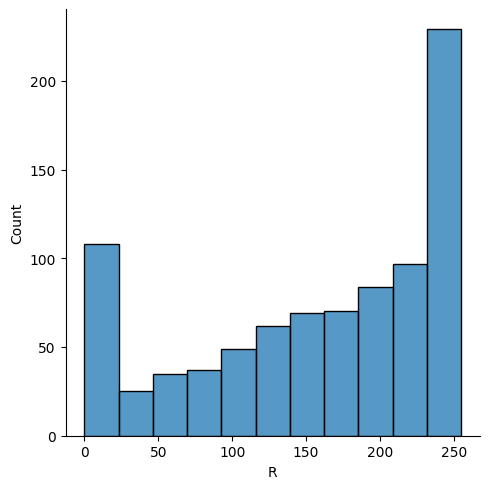

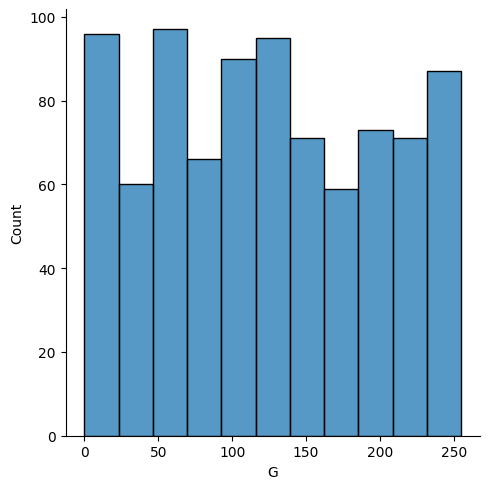

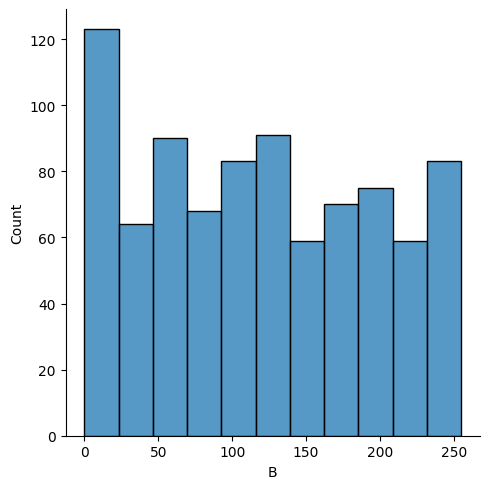

In [8]:
for i in ['R', 'G', 'B']:
    sns.displot(data[i], kind='hist')

## Checking Count of Colors
From the below results we can see that the labels for all the colors are not available and the data is limited.    
Since there are 255 pixels in each color of RGB format and there are 3 colors so a total of 16581375 colors are possible.   
But the data only contains 885 values so we need to find a way to deal with that.

In [9]:
len(data['R'].unique())

221

In [10]:
len(data['G'].unique())

234

In [11]:
len(data['B'].unique())

230

In [12]:
# max possible color combinations
255**3

16581375

## Test Image Data

In [13]:
# Loading the image
img_path = '../data/external/girlpic.jpg'
img = cv2.imread(img_path)

## Image Resolution

In [14]:
img.shape

(736, 736, 3)

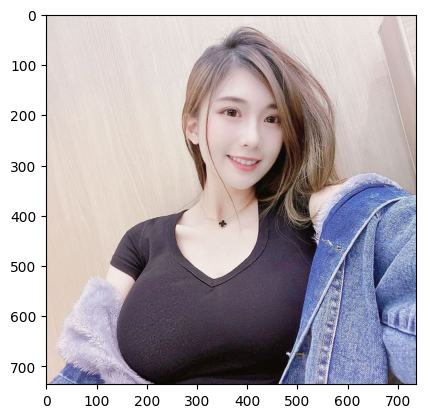

In [15]:
# Converting the image color to RGB from BGR(because OpenCV read images as BGR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [18]:
data.to_csv('../data/interim/train.csv', index=False)

## Conclusion
- Successfully loaded the dataset
- Successfully loaded the test image
- Dataset only has few color combinations
- A way to predict other colors need to be found